In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')  # Use some nicer default colors
import random
import numpy as np
from math import isnan
from math import pi, sin, cos

#run the code below to install the package. Can be commented away afterwards
!apt-get update && apt-get install -y python3-opencv
import cv2

#packages for turning graph into numpy.
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from PIL import Image

DEGREES_TO_RADIANS = pi / 180
LETTER_STRING = 'abcdefghij'

Hit:1 http://deb.debian.org/debian buster InRelease
Get:2 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Hit:3 http://security.debian.org/debian-security buster/updates InRelease
Fetched 51.9 kB in 0s (146 kB/s)




python3-opencv is already the newest version (3.2.0+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
3 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.
Setting up python3-pkg-resources (40.8.0-1) ...
Fatal Python error: init_sys_streams: can't initialize sys standard streams
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/io.py", line 54, in <module>
ImportError: cannot import name 'open_code' from 'io' (unknown location)
Aborted (core dumped)
dpkg: error processing package python3-pkg-resources (--configure):
 installed python3-pkg-resources package post-installation script subprocess returned error exit status 134
dpkg: dependency problems prevent configuration of 

In [2]:
def plot_coords(coords, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.gca().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y)

## Mutation strategy
Below we find the main function used for mutating rules of a solution. 
The function applies changes with some probability p. It either removes, changes or adds new characters to the existing rule string. 


In [3]:
def point_mutation_transformation(transformations, key):
    '''
    change the value of a transformation based on letter
    '''
    # generate the letter that we want to change and the letter to replace it with
    old_letter = random.choice(LETTER_STRING).upper()
    #old_letter = transformations[key]
    new_letter = random.choice(LETTER_STRING).upper()
    print(old_letter, new_letter)
            
    # point mutation-like change of transformation rules
    old_transformation = transformations[key]
            
    # replace by other letter(s) random duplication
    #transformations[key] = old_transformation.replace(old_letter, random.randint(0,4)*new_letter) #CHANGE HERE
            
    # replace by other letter(s) for random amount of times with random duplication
    nr_letter = old_transformation.count(old_letter)
    transformations[key] = old_transformation.replace(old_letter, random.randint(0,4)*new_letter, random.randint(0, nr_letter)) #CHANGE HERE
            
    # remove all old_letter values
    #transformations[key] = old_transformation.replace(old_letter, '') #CHANGE HERE
            
    # if a new letter is added to the dict values that is not already a key, add it to the dict
    if new_letter not in transformations: 
        transformations[new_letter] = transformations[key] *3 #CHANGE HERE

In [4]:
def change_letter(transformations, key, index):
    '''
    the key is a letter
    '''
    new_letter = random.choice(LETTER_STRING).upper()

    list_conversion = list(transformations[key])
    list_conversion[index] = new_letter
    transformations[key] = "".join(list_conversion)

    #transformations[key][index] = new_transformation

    # if a new letter is added to the dict values that is not already a key, add it to the dict
    if new_letter not in transformations: 
        transformations[new_letter] = transformations[key] *3 #CHANGE HERE

In [5]:
def remove_branch_left(transformations, key, index_left):
    '''
    the key is a left bracket, if we remove a left bracket we should remove the first right bracket after the left
    '''
    print('left', transformations[key])
    list_conversion = list(transformations[key])
    #index_right = string_conversion.find(']')

    # we need to add the index from where it starts searching for the right bracket to the result
    start_index_right = len(transformations[key][:index_left])
    index_right = start_index_right + transformations[key][index_left:].index(']')
    print(index_left, index_right)

    # remove the brackets
    list_conversion[index_right] = ''
    list_conversion[index_left] = ''

    transformations[key] = "".join(list_conversion)
    print(transformations[key])

In [6]:
def remove_branch_right(transformations, key, index_right):
    '''
    the key is a right bracket
    '''
    print('right', transformations[key])
    list_conversion = list(transformations[key])
    #index_left = string_conversion.find('[')

    index_left = transformations[key].index('[')
    print(index_left, index_right)

    # remove the brackets
    list_conversion[index_right] = ''
    list_conversion[index_left] = ''

    transformations[key] = "".join(list_conversion)
    print(transformations[key])

In [7]:
def add_branch(transformations, key, index_left):
    '''
    transformations: the set of rules
    key: the key of the rule that is currently being altered
    index: starting index of the new branch

    Adds a new pair of brackets, starting at index given as the parameter, and ending at a random index 
    within the string, right to the start of the branch
    '''
    if index_left <= len(transformations[key]): #<= if empty branches allowed
        list_conversion = list(transformations[key])
        list_conversion.insert(index_left, "[")

        index_right =  np.random.randint(index_left+1, len(transformations[key])+2)
        #in case empty branches are allowed index+1

        list_conversion.insert(index_right,"]")

        transformations[key] = "".join(list_conversion)

In [8]:
def remove_plus_minus(transformations, key, index):
    '''
    the key is a plus or minus, remove the character
    '''
    list_conversion = list(transformations[key])

    # remove the character
    list_conversion[index] = ''

    transformations[key] = "".join(list_conversion)

In [9]:
def add_plus_minus(transformations, key, index):
    '''
    add a plus or a minus
    '''
    list_conversion = list(transformations[key])

    list_conversion.insert(index+1, random.choice(["+", "-"]))

    transformations[key] = "".join(list_conversion)


In [10]:
def mutate_transformations(transformations, p):
    '''
    loops over the transformations and changes them 
    '''
    keys = list(transformations.keys())
    # loop over keys from transformations dict and change the value of that key with chance p
    for i in range(len(keys)):
        random_nr = random.random()
         
        key = keys[i]

        #point_mutation_transformation(transformations, key)

        # get random index in transformations key and change that
        index = random.randint(0, len(transformations[key])-1)
        value = transformations[key][index]

        if random_nr >= 0.95:
            add_plus_minus(transformations, key, index)

        '''I've commented this out because it generates unbalanced lists... '''
        #insert
        #elif random_nr >= 0.90:
        #    add_branch(transformations, key, index)

        if random_nr >= p:
            #change existing characters
            if value.isalpha(): change_letter(transformations, key, index)

            #remove existing characters
            elif value == '[' : 
                remove_branch_left(transformations, key, index)
                print('remove left')
            elif value == ']' : 
                remove_branch_right(transformations, key, index)
                print('remove right')
            elif value == '+' or '-' : remove_plus_minus(transformations, key, index)

            else: pass
        	
    return transformations

In [11]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

In [12]:
def transform_multiple_evolve(sequence, transformations, iterations, p):
    '''Tranforms for multiple iterations with evolution'''
    for _ in range(iterations):
        transformations = mutate_transformations(transformations, p)
        print('seq', sequence)
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [13]:
def transform_multiple(sequence, transformations, iterations):
    '''Tranforms for multiple iterations'''
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [14]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    print('turtle', turtle_program)
    print('saved:', saved_states)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in LETTER_STRING:        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                    y + sin(angle * DEGREES_TO_RADIANS),
                    angle)
                
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            #try:                                   # indexerror sometimes occurred when there were no brackets this solves it 
                state = saved_states.pop()
                yield (float('nan'), float('nan'))
                x, y, _ = state
                yield (x, y)
            #except IndexError:
            #    pass
        

In [15]:
def l_plot_evolve(axiom, transformations, iterations=0, angle=45, p=0.75):
    turtle_program = transform_multiple_evolve(axiom, transformations, iterations, p)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

In [16]:
def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

Here you can see the difference between with and without evolution. If you run the evolve function a few times you'll see that it changes, the non-evolved one is deterministic. 

seq A
seq F[+AF-[A]--A][---A]
seq FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]
seq A+FA+F[+A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]A+FA+F-[A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]
seq F[+AF-[A]--A][---A]+A+FF[+AF-[A]--A][---A]+A+F[+F[+AF-[A]--A][---A]+A+F[+A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]F[+AF-[A]--A][---A]+A+F-[A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---A+F[+F[+AF-[A]--A][---A]A+F-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][--

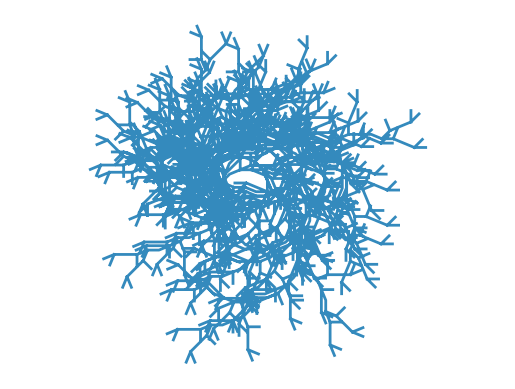

In [17]:
#l_plot_evolve('A', {'F': ['F', 'F'], 'A': ['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']}, 5, 22.5)
l_plot_evolve('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

turtle FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]FFFFFFFF-[FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]]--FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A

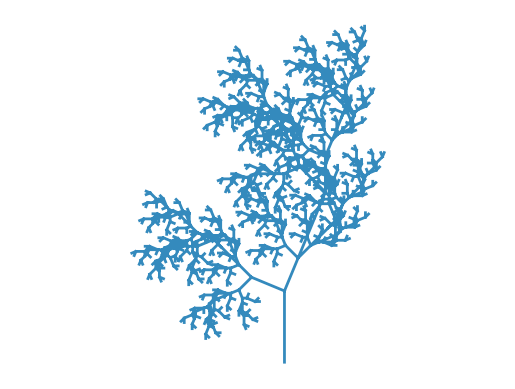

In [18]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

## Generate a random working solution
This part implements a method for generating a random starting solution for the algorithm

In [19]:
def generate_random_rule(key,auxi_characters, transformations):
    '''
    Generates simple, random rules containing the key and the characters from other keys 
    ,and characters like []+-
    The rules are added to the dictionary
    '''
    nr_chars_left = np.random.randint(1,3)
    nr_chars_right = np.random.randint(1,3)
    rule  = key+"".join(random.choices(key+auxi_characters+"+"+"-", k = nr_chars_right))
    rule =  "".join(random.choices(key+auxi_characters+"+"+"-", k = nr_chars_left))+(rule)

    
    transformations[key] = rule
    #add branch with some probability
    ind_branch = np.random.randint(0,2)
    if ind_branch < len(rule):
        add_branch(transformations, key, ind_branch)
    



def generate_random_dictionary():
    '''
    Generates a simple transformation dictionary.
    return: rule dictionary
    '''
    transformations = {}
    nr_rules = np.random.randint(1,4)
    init_keys = "".join(random.choices(LETTER_STRING.upper(),k= nr_rules))
    
    for key in init_keys:
        if key not in transformations.keys():
            generate_random_rule(key,init_keys, transformations)
    return transformations

{'H': '-[+]HHH'}
turtle -[+]-[+]-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH-[+]-[+]HHH-[+]HHH-[+]HHH
saved: []


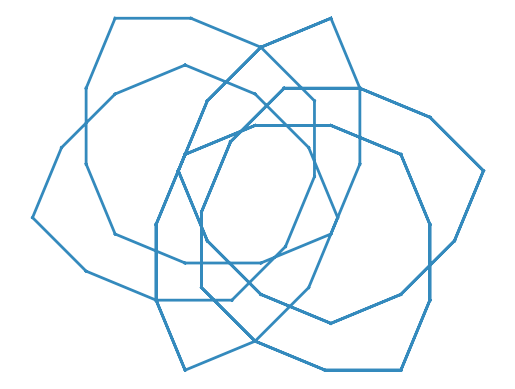

In [20]:
# test method
rules = generate_random_dictionary()
axiom = list(rules.keys())[0]
print(rules)
l_plot(axiom, rules, 5, 22.5)


## Fitness function
This section contains all functions necessary for calculating the fitness of a solution . The fitness is calculated using the matchShapes function from the cv package which uses several moments to compare two shapes.

In [21]:
def get_coords(transformations):
    axiom = list(rules.keys())[0]
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    return zip(*coords)

In [22]:
def turn_coords_to_numpy(X,Y):
    '''
    X: list of x-coordinates
    Y: list of y-coordinates
    Turns the X and Y coordinates as extracted from zip(*branching_turtle_to_coordinates())
    into a numpy array representing the figure.
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.tight_layout(pad=0)

    # To remove the huge white borders
    ax.margins(0)
    ax.plot(X,Y, color="black")
    ax.axis('off')

    fig.canvas.draw()       # draw the canvas, cache the renderer
    plt.close()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return image

In [23]:
#NOTE: currently the resolution of the image is 480 by 640. We might want to reduce it in the future.
def calculate_fitness(coordinates, optimal):
    '''
    coordinates: a tuple of the lists of x-coordinates and y-coordinates 
    optimal: the graphic representation of the  goal solution in the form of a numpy array

    '''
    X,Y = coordinates
    nump_sol = turn_coords_to_numpy(X,Y)
    nump_sol = np.reshape(nump_sol[:,:,0],(480,640,1))
    fitness = cv2.matchShapes(nump_sol,optimal,cv2.CONTOURS_MATCH_I1,0)
    return fitness

## The selection algorithm
This part contains all necessary functions for the tournament selection algorithm.
The implementation of the algorithm is based on this tutorial  https://www.geeksforgeeks.org/tournament-selection-ga/

In [24]:
def run_tournament_selection(population, optimal, tournament_size, size_pop):
    '''
    Runs tournament selection on the current situation. 
    This function computes the fitness of each candidate and then repeatedly 
    chooses k candidates out of the population and selects the best one
    until the new population has formed. (selection with replacement)
    '''

    selected = []

    #compute the fitness for each candidate
    coords_list = [get_coords(transformation) for transformation in population]
    fitness_list = [calculate_fitness(coordinate, optimal)for coordinate in coords_list]
    
    #run several tournaments, until there are enough candidates selected to replace the population
    while len(selected)< size_pop:
        #choose some random candidates from the population
        chosen_pop = random.sample(range(len(population)), tournament_size)

        # custom argmin
        f = lambda i: fitness_list[i]
        winner_ind = min(chosen_pop,key = f)

        #add the best solution
        selected.append(population[winner_ind])

    return selected


## Putting everything together

The implementation of the genetic alorithm using the earlier defined fitness function, mutation mechanics and selection mechanics.

In [25]:
def show_im_from_rules(transformations):
    X,Y = get_coords(transformations)
    im_nump = turn_coords_to_numpy(X,Y)
    img = Image.fromarray(im_nump, 'RGB')
    img.show()


#### define the goal structure

turtle FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]FFFFFFFF-[FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]]--FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A

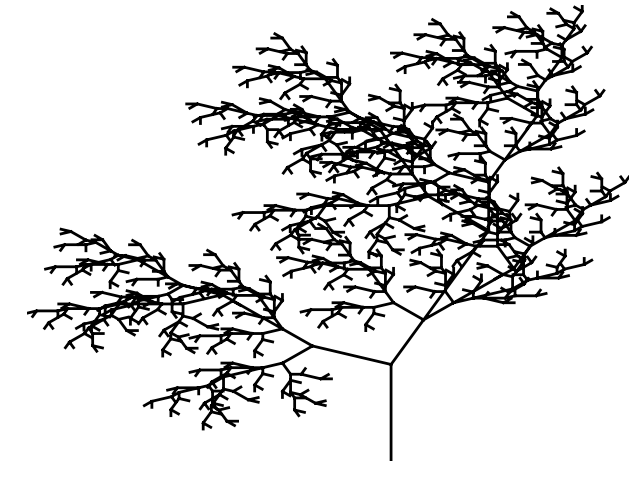

In [30]:
#goal parameters
axiom = 'A'
transformations = {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'} 
iterations = 5
angle = 22.5
goal_program = transform_multiple(axiom, transformations, iterations)
coords_g = branching_turtle_to_coords(goal_program, angle)
X,Y = zip(*coords_g)
goal_nump = turn_coords_to_numpy(X,Y)
#ensure that it is not RGB anymore 
optimal =  np.reshape(goal_nump[:,:,0],(480,640,1))
img = Image.fromarray(goal_nump, 'RGB')
img.show()


In [32]:
#WORK IN PROGRESS
#initialize population
size_pop = 15
population = []
nr_generations = 20
best_fit = []
tournament_size = 3
pm = 1.0 #probability of children mutating, the chernobyl setting = 1.0
for mu in range(size_pop):
    population.append(generate_random_dictionary())

#simulate evolution
for gen in range(nr_generations):

    #?select random pairs 
    #?cross over
    # Some plants can grow offspring from their own roots: cloning
    # so who needs cross over anyway

    #mutations
    children = population.copy()
    for nr, child in enumerate(children):
        children[nr] = mutate_transformations(child, pm)
    population.extend(children)

    #select new generaton
    
    population = run_tournament_selection(population, optimal, tournament_size, size_pop)
    children.clear()

    

saved: []
turtle [-[-[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II]-[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II-[]+-[]+-[]+II-[]+II-[]+-[]+II-[]+II]-[-[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II]-[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II-[]+-[]+-[]+II-[]+II-[]+-[]+II-[]+II[-[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II-[]+-[]+II-[]+II]-[-[-[-H]-HHI]-[-H]-HHI[-H]-HHI-[]+II]-[-[

turtle [+----+[+----+[+----+[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+-----++]-+[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+---[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+----+----[]+-+----[]+-+-I+-+--I++-+-----[]+-+-I+-+--I++-----++]-+[+----+[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+-----++]-+[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+---[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+----+----[]+-+----[]+-+-I+-+--I++-+-----[]+-+-I+-+--I++---[+----+[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+-I---[+----+H--++]-+HH-+-I----+----[]+-+-I+-+--I+-----++]-+[+----+[+----+H--++]-+HH-+-I-----++]-+[+----+H--++]-+HH-+

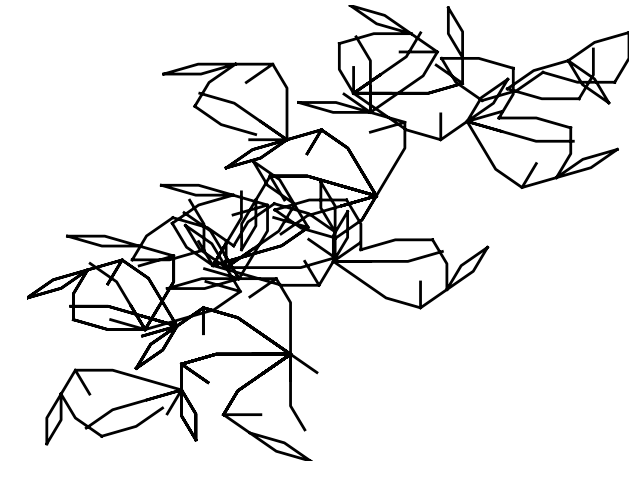

In [33]:
#show population

show_im_from_rules(population[0])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48486dc9-a1a6-4dac-ab77-4156e0b947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>